# Two_layer_net_numpy

## numpy realization

In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# N, D_in, H, D_out: Batch size, input size, hidden dimension, output size
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Randomly initialize weights
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6

In [25]:
for t in range(200):
    # Forward pass
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)
    
    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 10 == 0:
        print(t, loss)
    
    # Backpropagation 
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[grad_h < 0] = 0
    grad_w1 = x.T.dot(grad_h)
    
    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 444.162338574896
10 339.4491447497711
20 260.5573131661747
30 200.84408546905314
40 155.4246697993538
50 120.727625814796
60 94.09796537384167
70 73.59368587452764
80 57.74737518675988
90 45.45705604372796
100 35.8958129858751
110 28.43278478870279
120 22.58926021828308
130 17.999847871709832
140 14.384989721335405
150 11.529790380768448
160 9.268523921506063
170 7.473224531996838
180 6.043914094851909
190 4.902807023055179


## PyTorch realization

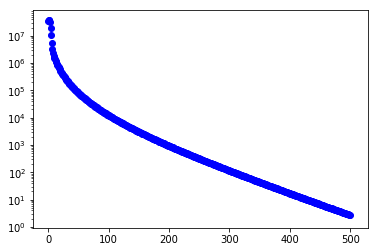

In [55]:
import torch

dtype = torch.float
device = torch.device('cpu')

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

w1 = torch.randn(D_in, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)

learning_rate = 1e-6

fig, ax = plt.subplots()
ax.set_yscale('log')
for t in range(500):
    # Forward, compute predicted y
    z = x.mm(w1)
    z_relu = z.clamp(min=0)
    y_pred = z_relu.mm(w2)
    
    # Compute loss
    loss = (y_pred - y).pow(2).sum().item()
    ax.scatter(t, loss, color='b')
        
    # Backprop
    delta_y = 2 * (y_pred - y)
    grad_w2 = z_relu.T.mm(delta_y)
    delta_z = delta_y.mm(w2.T)
    delta_a = delta_z.clone()
    delta_a[delta_a < 0] = 0
    grad_w1 = x.T.mm(delta_a)

    
    # Update
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    